In [17]:
#IMPORTS
import qiskit
import numpy as np
from qiskit import *
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_bloch_vector

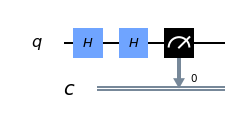

In [18]:
h_x = QuantumCircuit(1,1) #make a QC with 1 quantum bit and 1 classical bit
#
#h_x.x(0) # x gate at qbit 0
h_x.h(0) #add a hadamard qate to bit 0
h_x.h(0) #add a hadamard qate to bit 0
h_x.measure(0,0) #measure the 0th qbit and map to the 0th classical bit

h_x.draw(output='mpl') #draw the circuit

Results for z measurement:


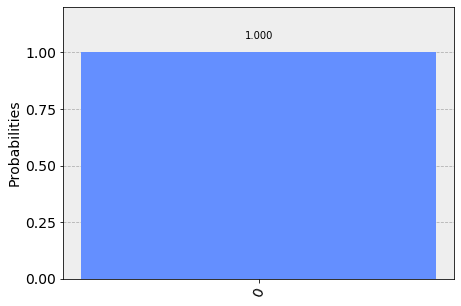

In [19]:
print('Results for z measurement:')
counts = execute(h_x,Aer.get_backend('qasm_simulator')).result().get_counts()
plot_histogram(counts) #do the simulation by getting the Aer backend end, and plot the histogram results, remember the default shots is 1024

In [20]:
qc = QuantumCircuit(1) #make a quantum circuit with 1 qbit and 0 classical bits

In [21]:
# z measurement of qubit 0
measure_z = QuantumCircuit(1,1)
measure_z.measure(0,0);

# x measurement of qubit 0
measure_x = QuantumCircuit(1,1)
measure_x.h(0)
measure_x.measure(0,0)

# y measurement of qubit 0
measure_y = QuantumCircuit(1,1)
measure_y.sdg(0)
measure_y.h(0)
measure_y.measure(0,0);

In [29]:
shots = 2**14 # number of samples used for statistics

bloch_vector = [] #empty vector to add to, need 3 dimensions !!!!!!!!!
for measure_circuit in [measure_x, measure_y, measure_z]: #for eeach circuit, take the generic quantum circuit and add to it
    
    # run the circuit with a the selected measurement and get the number of samples that output each bit value
    counts = execute(qc+measure_circuit,Aer.get_backend('qasm_simulator'),shots=shots).result().get_counts()

    # calculate the probabilities for each bit value
    probs = {} #create empty array of probabilities
    for output in ['0','1']: #indices need '1'
        if output in counts:
            probs[output] = counts[output]/shots
        else:
            probs[output] = 0
            
    bloch_vector.append( probs['0'] -  probs['1'] )

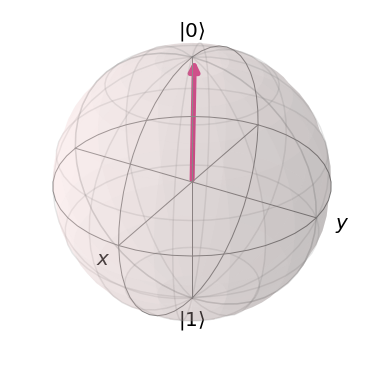

In [30]:
plot_bloch_vector( bloch_vector )